In [55]:
import os, pickle
from tqdm import tqdm  # Import tqdm for progress tracking
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import pyemma
import pyemma.coordinates as coor

## Load in important functions

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)
    

In [3]:
def omega2cistrans(omega):
    """Converts a sequence of float omega angles (in degrees) to an array of ints: 0 cis and 1 trans."""
    
    shifted_omega = (omega + 90.0) % 360.0 - 90.0 # shift into (-90, 270) range to avoid periodic boundaries
    
    cistrans = np.where(shifted_omega > 90.0, 1, 0).astype(int)
    return cistrans

## Prepare the Data and the log (indicating of the data state)

In [4]:
save_dir = 'omega_data'
all_omega = Data.load(f"{save_dir}/all_omega.pkl").array_list  # This is an (85, x, 3) array
# Convert each array in the list to float
all_omega = [arr.astype(float) for arr in all_omega]

# Apply omega2cistrans() to each array in all_omega
all_cistrans = [omega2cistrans(arr) for arr in all_omega]

# Print shape of the first converted array for verification
print(f"First array shape after conversion: {all_cistrans[0].shape}")

First array shape after conversion: (9002, 3)


In [79]:
# Find the minimum x-dimension across all arrays
min_x = min(arr.shape[0] for arr in all_cistrans)

print(f"Shortest x in all_cistrans: {min_x}")

Shortest x in all_cistrans: 3001


In [5]:
# Define paths
traj_path = 'PROJ12462traj'
log_path = 'log'

all_state = []

# Iterate over RUN and CLONE indices
for r in range(2, 3):  # Only r=2 for now
    for c in range(100):  # Iterate over c=0 to c=99
        csv_log = f"{log_path}/RUN{r}_CLONE{c}_log.csv"
        input_xtc_file = f"{traj_path}/r{r}c{c}_inte.xtc"

        # Corrected condition: Check if either file is missing
        if not os.path.exists(csv_log) or not os.path.exists(input_xtc_file):
            print(f"Missing file(s): {input_xtc_file if not os.path.exists(input_xtc_file) else ''}")
            print(f"Missing log file(s): {csv_log if not os.path.exists(csv_log) else ''}")
            continue

        # Load log and convert states
        df_log = pd.read_csv(csv_log, header=0)
        log = df_log.iloc[:, 0].values  # Convert to NumPy array
        all_state.append(log)

all_state

Missing file(s): PROJ12462traj/r2c8_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c32_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c46_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c48_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c49_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c57_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c59_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c77_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c79_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c87_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c91_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c93_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c95_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c96_inte.xtc
Missing log file(s): 
Missing file(s): PROJ12462traj/r2c99_inte.xtc
Mis

[array([0, 2, 1, ..., 2, 3, 2]),
 array([0, 1, 3, ..., 1, 2, 1]),
 array([0, 1, 3, ..., 0, 1, 1]),
 array([0, 2, 0, ..., 1, 1, 0]),
 array([0, 2, 1, ..., 2, 2, 2]),
 array([0, 2, 1, ..., 0, 1, 1]),
 array([0, 2, 1, ..., 3, 1, 2]),
 array([0, 3, 2, ..., 3, 2, 2]),
 array([0, 3, 0, ..., 3, 1, 2]),
 array([0, 2, 1, ..., 0, 1, 0]),
 array([0, 2, 0, ..., 3, 3, 0]),
 array([0, 2, 3, ..., 2, 3, 3]),
 array([0, 2, 2, ..., 0, 0, 1]),
 array([0, 3, 2, ..., 3, 0, 0]),
 array([0, 1, 3, ..., 0, 1, 1]),
 array([0, 2, 3, ..., 1, 0, 1]),
 array([0, 2, 1, ..., 3, 2, 3]),
 array([0, 2, 0, ..., 3, 2, 3]),
 array([0, 1, 3, ..., 3, 3, 3]),
 array([0, 1, 3, ..., 1, 0, 0]),
 array([0, 2, 1, ..., 1, 1, 1]),
 array([0, 3, 0, ..., 1, 1, 0]),
 array([0, 1, 1, ..., 3, 3, 1]),
 array([0, 1, 0, ..., 2, 1, 2]),
 array([0, 1, 1, ..., 3, 3, 2]),
 array([0, 2, 3, ..., 1, 2, 2]),
 array([0, 2, 0, ..., 1, 0, 1]),
 array([0, 2, 3, ..., 0, 2, 1]),
 array([0, 1, 1, ..., 0, 2, 1]),
 array([0, 2, 2, ..., 3, 2, 3]),
 array([0,

In [6]:
import numpy as np

unique_states = np.unique(all_state[9])
print(unique_states)


[0 1 2 3]


### Create a new data with 85, x, 4 (binary cis/trans state + lambda state)

In [77]:
# Assuming all_cistrans and all_state are lists of numpy arrays
new_all = []

for i in range(len(all_cistrans)):  # Loop over 85 trajectories
    x_len = all_cistrans[i].shape[0]  # Get the x dimension from all_cistrans

    # Trim all_state[i] to match the first x_len frames
    state_trimmed = all_state[i][:x_len]  # Ensure same length along x

    # Reshape state to (x, 1) if necessary
    state_trimmed = state_trimmed.reshape(-1, 1)  # Ensure shape (x, 1)

    # Concatenate along the last axis to get (x, 4)
    combined = np.concatenate((all_cistrans[i], state_trimmed), axis=1)

    # Append to new list
    new_all.append(combined)

new_all[4]

array([[1, 1, 1, 0],
       [1, 0, 0, 2],
       [1, 0, 1, 1],
       ...,
       [1, 0, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 0]])

In [123]:
import numpy as np


def state_to_index(state):
    """Converts a (4,) state array into a unique index (0-31)."""
    state = np.array(state)  # Convert to numpy array if it's not already
    if state.shape != (4,):
        raise ValueError(f"Unexpected state shape: {state.shape}, expected (4,). State: {state}")
    
    binary_part = state[:3]  # First 3 elements (either 0 or 1)
    last_part = state[3]  # Last element (0 to 4)

    # Convert binary part to integer (0-7)
    binary_index = int("".join(str(int(b)) for b in binary_part), 2)

    # Combine binary index and last part to get a unique index (0-31)
    return binary_index * 4 + last_part

def get_transition_matrix(traj, num_states, lagtime, pseudocount=0.25):
    """Returns a row-normalized transition matrix T for a given lagtime (in steps) for a single traj."""
    
    C = np.zeros((num_states, num_states))  # Count matrix

    N = len(traj)  # Number of time steps for this trajectory

    for t in range(0, N - lagtime):
        from_state = traj[t]  # Directly use index
        to_state = traj[t + lagtime]  # Directly use index

        # Count transitions
        C[from_state, to_state] += 1.0

    # Add pseudocounts to avoid zero entries
    C += pseudocount

    # Normalize rows to get probabilities
    T = C / C.sum(axis=1, keepdims=True)

    return T


def decomposition_transition_state(T, lagtime=1):
    """Return the implied timescale and the corresponding eigenvector.
    
    INPUT
    T       - Transition matrix where T_ij is the probability of transitioning i -> j in lagtime.
    
    PARAMETERS
    lagtime - Lagtime used to build T (in units of steps). Default = 1.
    num_states - Number of states 
    
    RETURN
    t2      - The implied timescale (in units of steps).
    v1      - The right eigenvector corresponding to the slowest non-stationary mode.
    """
    try:
        # Compute eigenvalues and eigenvectors
        evals, evecs = np.linalg.eig(T.T)  # Compute right eigenvectors

        # Find the second largest eigenvalue (slowest relaxation mode)
        sorted_indices = np.argsort(evals)[::-1]  # Sort eigenvalues in descending order
        mu2 = evals[sorted_indices[1]]  # Second largest eigenvalue
        # Compute the implied timescale
        t2 = -1.0 * lagtime / np.log(mu2)

        # Compute the stationary state composition 
        n_states = T.shape[0]
        A = np.transpose(T) - np.eye(n_states)
        A = np.vstack([A, np.ones(n_states)])
        b = np.zeros(n_states + 1)
        b[-1] = 1
        pi, *_ = np.linalg.lstsq(A, b, rcond=None)

    except Exception as e:
        t2 = np.nan
        pi = None
        print(f"Error computing implied timescale: {e}")

    return t2, pi


In [ ]:
lagtime = 10
pseudocount = 0.25
num_states = 32
lagtime = 1




for i, traj in enumerate(new_all):
    
    #print(traj.shape)
    traj_index = []
    ## Change the state into index in each traj 
    for frame, state in enumerate(traj):
        #print(state.shape)
        index = state_to_index(state)
        #print(state, index)
        traj_index.append(index)
    #print(np.shape(traj_index))

    ## calculate the transition matrix 
    T = get_transition_matrix(traj_index, num_states=num_states)

    ## Calculate the eigenvalue (implied time scale) and eigenvector (stable population) from the Transition matrix
    t2, v2 = decomposition_transition_state(T, lagtime=lagtime)
    print(t2, v2)


    break



(3.2827285603179823-0j) [ 0.05213244+0.j  0.05870178+0.j  0.07377178+0.j  0.04248396+0.j
  0.19716897+0.j  0.20081953+0.j  0.23303175+0.j  0.18040792+0.j
 -0.09900096+0.j -0.10028752+0.j -0.08158012+0.j -0.06702455+0.j
 -0.09013504+0.j -0.119138  +0.j -0.12772858+0.j -0.12862182+0.j
  0.13207587+0.j  0.12223172+0.j  0.13170364+0.j  0.08334522+0.j
  0.28104708+0.j  0.31463414+0.j  0.25709709+0.j  0.20082587+0.j
 -0.21959338+0.j -0.27671715+0.j -0.26639316+0.j -0.17711215+0.j
 -0.1693359 +0.j -0.18201779+0.j -0.22841812+0.j -0.22837454+0.j]
() (32,)


In [92]:
import numpy as np
import matplotlib.pyplot as plt

lagtime = 10
pseudocount = 0.25
num_states = 32
lagtimes = [1, 10, 25, 50] + list(range(100, 20000, 200))

dt_in_ns = 0.01  # Define dt_in_ns if not defined earlier

# Store final results
t2_all_means = [] 
t2_all_uppers = []
t2_all_lowers = []
v1_all_means = []
v1_all_uppers = []
v1_all_lowers = []

for lagtime in lagtimes: 
    print(f'Processing lagtime = {lagtime}')
    
    # Make a blank list for storing the values
    t2_all = []
    v1_all = []

    for i, traj in enumerate(new_all):
        traj_index = [state_to_index(state) for state in traj]

        ## Compute the transition matrix
        T = get_transition_matrix(traj_index, num_states, lagtime)

        ## Compute eigenvalues and eigenvectors
        t2, v1 = decomposition_transition_state(T)
        
        # Take only the real part to avoid complex values
        t2 = np.real(t2)
        # Extract only the first eigenvector (stationary distribution)
        v1 = np.real(v1) 
        
        t2_all.append(t2)  # Append (32,)
        v1_all.append(v1)  # Append (32,)

    # Convert lists to NumPy arrays
    t2_all = np.array(t2_all)  # Shape: (n_samples, 32)
    v1_all = np.array(v1_all)  # Shape: (n_samples, 32)
    
    print('v1_all.shape:', v1_all.shape)  # Should be (n_samples, 32)

    # Store results
    t2_means = np.mean(t2_all, axis=0)  # Shape: (32,)
    t2_uppers = np.mean(t2_all, axis=0) + np.std(t2_all, axis=0)
    t2_lowers = np.mean(t2_all, axis=0) - np.std(t2_all, axis=0)

    v1_means = np.mean(v1_all, axis=0)  # Shape: (32,)
    v1_uppers = np.mean(v1_all, axis=0) + np.std(v1_all, axis=0)
    v1_lowers = np.mean(v1_all, axis=0) - np.std(v1_all, axis=0)

    #print('v2_means.shape:', v2_means.shape)  # Should be (32,)
    #print('v2_means:', v2_means)  # Should be (32,)


    # Append values
    t2_all_means.append(t2_means)
    t2_all_uppers.append(t2_uppers)
    t2_all_lowers.append(t2_lowers)

    v1_all_means.append(v1_means)
    v1_all_uppers.append(v1_uppers)
    v1_all_lowers.append(v1_lowers)

# Convert to NumPy arrays
t2_all_means = np.array(t2_all_means)  # Shape: (4, 32)
t2_all_uppers = np.array(t2_all_uppers)
t2_all_lowers = np.array(t2_all_lowers)
v2_all_means = np.array(v1_all_means)  # Shape: (4, 32)
v2_all_uppers = np.array(v1_all_uppers)
v2_all_lowers = np.array(v1_all_lowers)
lagtimes_ns = np.array(lagtimes) * dt_in_ns

print("t2_all_means.shape:", t2_all_means.shape)  # Should be (4,)
print("v2_all_means.shape:", v1_all_means.shape)  # Should be (4, 32)


Processing lagtime = 1
v1_all.shape: (85, 32)
Processing lagtime = 10


KeyboardInterrupt: 

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress tracking

lagtime = 10
pseudocount = 0.25
num_states = 32
lagtimes = [1, 10, 25, 50] + list(range(100, 10000, 200))
#lagtimes = [1, 10, 25, 50]

dt_in_ns = 0.01  # Define dt_in_ns if not defined earlier

# Store final results
t2_all_means = [] 
t2_all_uppers = []
t2_all_lowers = []
v1_all_means = []
v1_all_uppers = []
v1_all_lowers = []
v1_all_stds = []

# Outer loop with tqdm (track progress over lagtimes)
for lagtime in tqdm(lagtimes, desc="Processing Lag Times", unit="lag"):
    #print(f'Processing lagtime = {lagtime}')
    
    # Make blank lists for storing values
    t2_all = []
    v1_all = []

    # Inner loop with tqdm (track progress over trajectories)
    for i, traj in enumerate(tqdm(new_all, desc=f"Lagtime {lagtime}", leave=False, unit="traj")):
        traj_index = [state_to_index(state) for state in traj]

        ## Compute the transition matrix
        T = get_transition_matrix(traj_index, num_states, lagtime)

        ## Compute eigenvalues and eigenvectors
        t2, v1 = decomposition_transition_state(T)
        
        # Take only the real part to avoid complex values
        t2 = np.real(t2)
        v1 = np.real(v1)  # Ensure it's real
        
        t2_all.append(t2)  # Append (scalar)
        v1_all.append(v1)  # Append (32,)

    # Convert lists to NumPy arrays
    t2_all = np.array(t2_all)  # Shape: (n_samples,)
    v1_all = np.array(v1_all)  # Shape: (n_samples, 32)
    
    # Store results
    t2_means = np.mean(t2_all)  # Single scalar
    t2_uppers = np.mean(t2_all) + np.std(t2_all)
    t2_lowers = np.mean(t2_all) - np.std(t2_all)

    v1_means = np.mean(v1_all, axis=0)  # Shape: (32,)
    v1_uppers = np.mean(v1_all, axis=0) + np.std(v1_all, axis=0)
    v1_lowers = np.mean(v1_all, axis=0) - np.std(v1_all, axis=0)
    v1_std = np.std(v1_all, axis=0)

    # Append values
    t2_all_means.append(t2_means)
    t2_all_uppers.append(t2_uppers)
    t2_all_lowers.append(t2_lowers)

    v1_all_means.append(v1_means)
    v1_all_uppers.append(v1_uppers)
    v1_all_lowers.append(v1_lowers)
    v1_all_stds.append(v1_std)

# Convert to NumPy arrays
t2_all_means = np.array(t2_all_means)  # Shape: (num_lagtimes,)
t2_all_uppers = np.array(t2_all_uppers)
t2_all_lowers = np.array(t2_all_lowers)
v1_all_means = np.array(v1_all_means)  # Shape: (num_lagtimes, 32)
v1_all_uppers = np.array(v1_all_uppers)
v1_all_lowers = np.array(v1_all_lowers)
v1_all_stds = np.array(v1_all_stds)
lagtimes_ns = np.array(lagtimes) * dt_in_ns

print("t2_all_means.shape:", t2_all_means.shape)  # Shoue46ld be (num_lagtimes,)
print("v1_all_means.shape:", v1_all_means.shape)  # Should be (num_lagtimes, 32)
print("v1_all_stds.shape:", v1_all_stds.shape)  # Should be (num_lagtimes, 32)



Processing Lag Times:   0%|          | 0/54 [00:00<?, ?lag/s]

Processing Lag Times: 100%|██████████| 54/54 [05:10<00:00,  5.76s/lag]

t2_all_means.shape: (54,)
v1_all_means.shape: (54, 32)
v1_all_stds.shape: (54, 32)


In [153]:
v1_all_means

array([[0.01572529, 0.01539753, 0.0150817 , ..., 0.04662226, 0.04724148,
        0.05075345],
       [0.01575355, 0.01542428, 0.01510461, ..., 0.04649885, 0.04709277,
        0.05058686],
       [0.01574976, 0.01542772, 0.01510556, ..., 0.04646747, 0.04702931,
        0.05055131],
       ...,
       [0.01978736, 0.01955807, 0.02008916, ..., 0.04218235, 0.042487  ,
        0.04378704],
       [0.02038518, 0.02030064, 0.02074892, ..., 0.04094801, 0.04145615,
        0.04302103],
       [0.02040783, 0.02018177, 0.02056953, ..., 0.04107469, 0.04226446,
        0.04323723]])

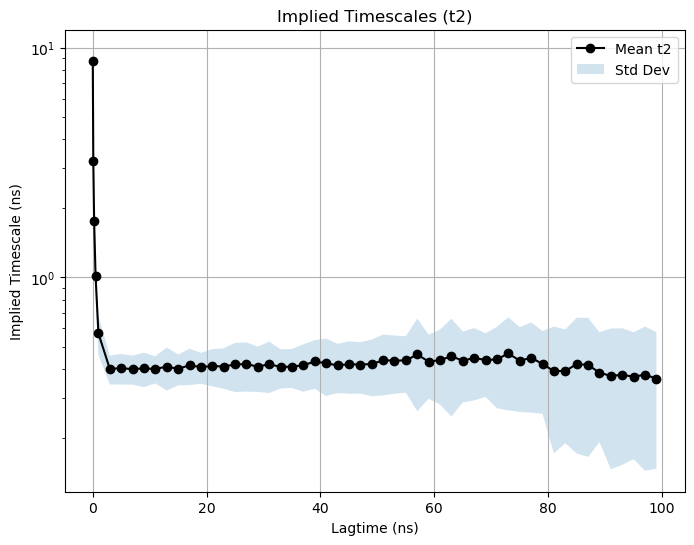

In [154]:
plt.figure(figsize=(8, 6))

# Plot mean implied timescale vs lagtime
plt.plot(lagtimes_ns, t2_all_means, 'ko-', label="Mean t2")

# Plot shaded region for standard deviation (fix: scale lagtimes_ns)
plt.fill_between(lagtimes_ns, 
                 t2_all_uppers, 
                 t2_all_lowers, 
                 alpha=0.2, label="Std Dev")

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied Timescale (ns)')

plt.yscale('log')  # Log scale to visualize timescales properly
plt.title('Implied Timescales (t2)')
plt.legend()
plt.grid(True)
plt.show()


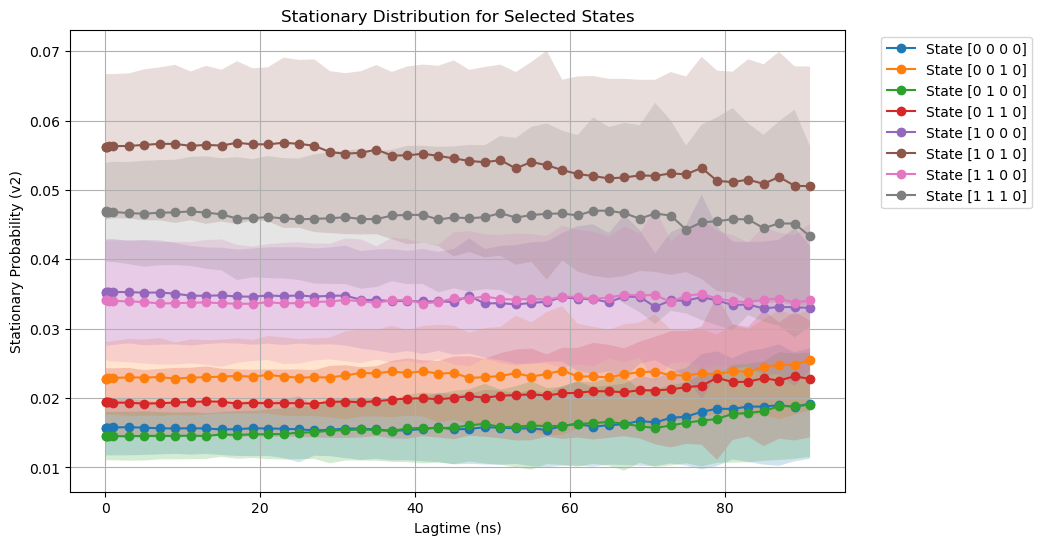

In [155]:
state_to_plot = [0, 4, 8, 12, 16, 20, 24, 28]

plt.figure(figsize=(10, 6))
time_to_plot = 50

for state in state_to_plot:  # Loop only over selected states
    plt.plot(lagtimes_ns[:time_to_plot], v1_all_means[:time_to_plot, state], '-o', label=f'State {index_to_state(state)}')
    
    # Plot shaded region for standard deviation (fix: scale lagtimes_ns)
    plt.fill_between(lagtimes_ns[:time_to_plot], 
                     v1_all_uppers[:time_to_plot, state],  # Select correct state column
                     v1_all_lowers[:time_to_plot, state], 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Selected States')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


In [141]:
v1_all_stds.shape

(54, 8)

In [156]:
state0_index = [0, 4, 8, 12, 16, 20, 24, 28]

# Extract columns from the second dimension
v1_all_means_0 = v1_all_means[:, state0_index]
v1_all_stds_0 = v1_all_stds[:, state0_index]

# Compute row sums
row_sums = v1_all_means[:, state0_index].sum(axis=1, keepdims=True)
# Renormalize the mean
v1_all_means_0 /= row_sums
# Renormalize the standard deviation
v1_all_stds_0 /= row_sums


# Print shapes to confirm correctness
print(f"v1_all_means_0 shape: {v1_all_means_0.shape}")  # Expected: (4, 8)
print(f"v1_all_stds_0 shape: {v1_all_stds_0.shape}")  # Expected: (4, 8)



v1_all_means_0 shape: (54, 8)
v1_all_stds_0 shape: (54, 8)


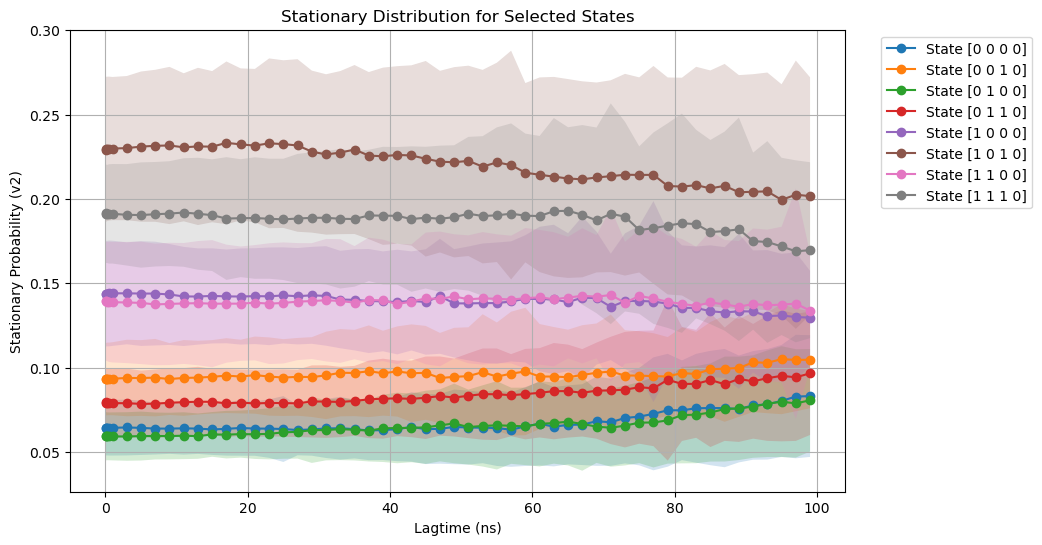

In [ ]:
plt.figure(figsize=(10, 6))

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(lagtimes_ns, v1_all_means_0[:, i], '-o', label=f'State {index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(lagtimes_ns, 
                     v1_all_means_0[:, i] + v1_all_stds_0[:, i],  # Upper bound
                     v1_all_means_0[:, i] - v1_all_stds_0[:, i],  # Lower bound
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Selected States of EE')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


In [ ]:
state_to_plot = [0, 4, 8, 12, 16, 20, 24, 28]

plt.figure(figsize=(10, 6))
time_to_plot = 50

for state in state_to_plot:  # Loop only over selected states
    plt.plot(lagtimes_ns[:time_to_plot], v1_all_means[:time_to_plot, state], '-o', label=f'State {index_to_state(state)}')
    
    # Plot shaded region for standard deviation (fix: scale lagtimes_ns)
    plt.fill_between(lagtimes_ns[:time_to_plot], 
                     v1_all_uppers[:time_to_plot, state],  # Select correct state column
                     v1_all_lowers[:time_to_plot, state], 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Selected States')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


array([0, 0, 0, 0])